# Phase 1 - Week 2 - Day 4 AM - Model Deployment

# A. Streamlit

---
## A.1 - Introduction

Streamlit is an open-source Python library that makes it easy to create and share beautiful, custom web apps for machine learning and data science. In just a few minutes you can build and deploy powerful data apps - so let’s get started!

1. Make sure that you have Python 3.6+ installed.
2. Install Streamlit using PIP and run the ‘hello world’ app:

```sh
pip install streamlit
streamlit hello
```

That’s it! In the next few seconds the sample app will open in a new tab in your default browser.

Still with us? Great! Now make your own app in just 3 more steps:

1. Open a new Python file, import `Streamlit`, and write some code
2. Run the file with :
   ```
   streamlit run [filename]
   ```

Now that you’re set up, let’s dive into more of how Streamlit works and how to build great apps.

---
## A.2 - Getting Started

First, we’ll create a new Python script and import Streamlit.

* Create a new Python file named `first_app.py`, then open it with your IDE or text editor.
* Next, import `Streamlit`.
   ```py
   import streamlit as st
   # To make things easier later, we're also importing numpy and pandas for working with sample data.
   import numpy as np
   import pandas as pd
   ```
* Run your app with
   ```
   streamlit run first_app.py
   ```
* A new tab will open in your default browser. It’ll be blank for now. That’s OK.
* You can kill the app at any time by typing `Ctrl+c` in the terminal.

---
## A.3 - Add Text and Data

Streamlit has a number of ways to add text to your app. Check out [Streamlit API reference](https://docs.streamlit.io/library/api-reference) for a complete list.

### A.3.1 - Add A Title

Let’s add a title to test things out:

```
st.title('My first app')
```

That’s it ! Your app has a title. You can use specific text functions to add content to your app, or you can use `st.write()` and add your own markdown.

### A.3.2 - Write A Dataframe

Along with magic commands, `st.write()` is Streamlit’s "Swiss Army knife". You can pass almost anything to `st.write()` such as text, data, Matplotlib figures, Altair charts, and more. Don’t worry, Streamlit will figure it out and render things the right way.

```py
st.write("Here's our first attempt at using data to create a table:")
st.write(pd.DataFrame({
    'first column': [1, 2, 3, 4],
    'second column': [10, 20, 30, 40]
}))
```

There are other data specific functions like `st.dataframe()` and `st.table()` that you can also use for displaying data. Check our advanced guides on displaying data to understand when to use these features and how to add colors and styling to your data frames.

---
## A.4 - Use Magic

You can also write to your app without calling any Streamlit methods. Streamlit supports **“magic commands”**, which means you don’t have to use `st.write()` at all! Try replacing the code above with this snippet:

```py
"""
# My first app
Here's our first attempt at using data to create a table:
"""

df = pd.DataFrame({
  'first column': [1, 2, 3, 4],
  'second column': [10, 20, 30, 40]
})

df
```

*Any time that Streamlit sees a variable or a literal value on its own line, it automatically writes that to your app using `st.write()`.*

---
## A.5 - Draw Charts and Maps

Streamlit supports several popular data charting libraries like `Matplotlib`, `Altair`, `deck.gl`, and more. In this section, you’ll add a bar chart, line chart, and a map to your app.

### A.5.1 - Draw A Line Chart

You can easily add a line chart to your app with `st.line_chart()`. We’ll generate a random sample using `NumPy` and then chart it.

```py
chart_data = pd.DataFrame(
     np.random.randn(20, 3),
     columns=['a', 'b', 'c'])

st.line_chart(chart_data)
```

### A.5.2 - Plot A Map

With `st.map()` you can display data points on a map. Let’s use `NumPy` to generate some sample data and plot it on a map of San Francisco.

```py
map_data = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])

st.map(map_data)
```

---
## A.6 - Lay Out Your App

For a cleaner look, you can move your widgets into a sidebar. This keeps your app central, while widgets are pinned to the left. Let’s take a look at how you can use `st.sidebar` in your app.

```py
option = st.sidebar.selectbox(
    'Which number do you like best?',
     df['first column'])

'You selected:', option
```

Most of the elements you can put into your app can also be put into a sidebar using this syntax: `st.sidebar.[element_name]()`. Here are a few examples that show how it’s used:
* `st.sidebar.markdown()`,
* `st.sidebar.slider()`,
* `st.sidebar.line_chart()`.

You can also use `st.columns` to lay out widgets side-by-side, or `st.expander` to conserve space by hiding away large content.

```py
left_column, right_column = st.columns(2)
pressed = left_column.button('Press me?')
if pressed:
  right_column.write("Woohoo!")

expander = st.expander("FAQ")
expander.write("Here you could put in some really, really long explanations...")
```

The only exceptions right now are `st.echo` and `st.spinner`.

---
## A.7 - Show Progress

When adding long running computations to an app, you can use `st.progress()` to display status in real time.

First, let’s import `time`. We’re going to use the `time.sleep()` method to simulate a long running computation:

```py
import time
```

Now, let’s create a progress bar:

```py
'Starting a long computation...'

# Add a placeholder
latest_iteration = st.empty()
bar = st.progress(0)

for i in range(100):
  # Update the progress bar with each iteration.
  latest_iteration.text(f'Iteration {i+1}')
  bar.progress(i + 1)
  time.sleep(0.1)

'...and now we\'re done!'
```

---
## A.8 - Interactive Widget

### A.8.1 - Button

```py
if st.button('Say hello'):
    st.write('Why hello there')
else:
    st.write('Goodbye')
```

### A.8.2 - Download Button

```py
@st.cache
def convert_df(df):
    # IMPORTANT: Cache the conversion to prevent computation on every rerun
    return df.to_csv().encode('utf-8')
csv = convert_df(my_large_df)
st.download_button(
    label="Download data as CSV",
    data=csv,
    file_name='large_df.csv',
    mime='text/csv',
)
```

### A.8.3 - Checkbox

```py
agree = st.checkbox('I agree')
if agree:
    st.write('Great!')
```

### A.8.4 - Radio Button

```py
genre = st.radio(
    "What's your favorite movie genre",
    ('Comedy', 'Drama', 'Documentary'))
if genre == 'Comedy':
    st.write('You selected comedy.')
else:
    st.write("You didn't select comedy.")
```

### A.8.5. Select

```py
option = st.selectbox(
    'How would you like to be contacted?',
    ('Email', 'Home phone', 'Mobile phone'))
st.write('You selected:', option)
```

### A.8.6 - Multiselect

```py
options = st.multiselect(
    'What are your favorite colors',
    ['Green', 'Yellow', 'Red', 'Blue'],
    ['Yellow', 'Red'])
st.write('You selected:', options)
```

### A.8.7 - Slider

```py
values = st.slider(
    'Select a range of values',
    0.0, 100.0, (25.0, 75.0))
st.write('Values:', values)
```

### A.8.8 - Range Select

```py
start_color, end_color = st.select_slider(
    'Select a range of color wavelength',
    options=['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet'],
    value=('red', 'blue'))
st.write('You selected wavelengths between', start_color, 'and', end_color)
```

### A.8.9 - Text

```py
title = st.text_input('Movie title', 'Life of Brian')
st.write('The current movie title is', title)
```

### A.8.10 - Number

```py
number = st.number_input('Insert a number')
st.write('The current number is ', number)
```

### A.8.11 - Text Area

```py
txt = st.text_area('Text to analyze', '''
    It was the best of times, it was the worst of times, it was
    the age of wisdom, it was the age of foolishness, it was
    the epoch of belief, it was the epoch of incredulity, it
    was the season of Light, it was the season of Darkness, it
    was the spring of hope, it was the winter of despair, (
    ''')
st.write('Sentiment:', run_sentiment_analysis(txt))
```

### A.8.12 - Date

```py
d = st.date_input(
    "When's your birthday",
    datetime.date(2019, 7, 6))
st.write('Your birthday is:', d)
```

### A.8.13 - Time

```py
t = st.time_input('Set an alarm for', datetime.time(8, 45))
st.write('Alarm is set for', t)
```

### A.8.14 - File Upload

```py
uploaded_file = st.file_uploader("Choose a file")
if uploaded_file is not None:
    # To read file as bytes:
    bytes_data = uploaded_file.getvalue()
    st.write(bytes_data)
    # To convert to a string based IO:
    stringio = StringIO(uploaded_file.getvalue().decode("utf-8"))
    st.write(stringio)
    # To read file as string:
    string_data = stringio.read()
    st.write(string_data)
    # Can be used wherever a "file-like" object is accepted:
    dataframe = pd.read_csv(uploaded_file)
    st.write(dataframe)
```

### A.8.15 - Add Widget to Sidebar


```py
import streamlit as st

add_selectbox = st.sidebar.selectbox(
    "How would you like to be contacted?",
    ("Email", "Home phone", "Mobile phone")
)
```

### A.8.16 - Display Matplotlib Plot

You can use `st.pyplot` to display a Matplotlib figure.

```py
import matplotlib.pyplot as plt
import numpy as np

arr = np.random.normal(1, 1, size=100)
fig, ax = plt.subplots()
ax.hist(arr, bins=20)

st.pyplot(fig)
```

### A.8.17. Display Plotly Plot

You can use `st.plotly_chart` to display a Plotly figure.

```py
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')

st.plotly_chart(fig)
```

### A.8.18 - Media and Layout

Display an image or list of images with `st.image()`.

```py
from PIL import Image
image = Image.open('sunrise.jpg')

st.image(image, caption='Sunrise by the mountains')
```

### A.8.19 - Columns

Insert containers laid out as side-by-side columns.

Inserts a number of multi-element containers laid out side-by-side and returns a list of container objects.

To add elements to the returned containers, you can use `with` notation (preferred) or just call methods directly on the returned object. See examples below.

You can use `with` notation to insert any element into a column:

```py
col1, col2, col3 = st.columns(3)
with col1:
  st.header("A cat")
  st.image("https://static.streamlit.io/examples/cat.jpg")

with col2:
  st.header("A dog")
  st.image("https://static.streamlit.io/examples/dog.jpg")

with col3:
  st.header("An owl")
  st.image("https://static.streamlit.io/examples/owl.jpg")
```

Or you can just call methods directly in the returned objects:

```py
col1, col2 = st.columns([3, 1])
data = np.random.randn(10, 1)

col1.subheader("A wide column with a chart")
col1.line_chart(data)

col2.subheader("A narrow column with the data")
col2.write(data)
```

### A.8.20 - Streamlit Container

Inserts an invisible container into your app that can be used to hold multiple elements. This allows you to, for example, insert multiple elements into your app out of order.

To add elements to the returned container, you can use `with` notation (preferred) or just call methods directly on the returned object. See examples below.

```py
with st.container():
  st.write("This is inside the container")

  # You can call any Streamlit command, including custom components:
  st.bar_chart(np.random.randn(50, 3))

st.write("This is outside the container")
```

### A.8.21 - Page Config

Configures the default settings of the page using `st.set_page_config()`.

```py
st.set_page_config(
    page_title="Ex-stream-ly Cool App",
    page_icon="🧊",
    layout="wide",
    initial_sidebar_state="expanded",
    menu_items={
        'Get Help': 'https://www.extremelycoolapp.com/help',
        'Report a bug': "https://www.extremelycoolapp.com/bug",
        'About': "# This is a header. This is an *extremely* cool app!"
    }
)
```

*API Cheatsheet [here](https://share.streamlit.io/daniellewisdl/streamlit-cheat-sheet/app.py) or [here](https://docs.streamlit.io/library/api-reference)*

---
## A.9 - Multipage Streamlit

We can create multiple apps and navigate across each of them in a main app using a radio button. Let’s see how to do that.

1. Create file `app1.py` and `app2.py`.
   ```py
   # Contents of `app1.py`
   import streamlit as st
   def app():
       st.title('APP1')
       st.write('Welcome to app1')
   ```

   ```py
   # Contents of `app2.py`
   import streamlit as st
   def app():
       st.title('APP2')
       st.write('Welcome to app2')
   ```

2. Create a main app. Let's say `main.py` and add a navigator using radio or select buttons.

   ```py
   # Contents of main.py
   import app1
   import app2
   import streamlit as st
   PAGES = {
       "App1": app1,
       "App2": app2
   }
   st.sidebar.title('Navigation')
   selection = st.sidebar.radio("Go to", list(PAGES.keys()))
   page = PAGES[selection]
   page.app()
   ```

3. Now you run the `main.py` to access and navigate through both the apps.

---
## A.10 - App Exercise

Streamlit is more than just a way to make data apps, it’s also a community of creators that share their apps and ideas and help each other make their work better. Please come join us on the community forum.

### A.10.1 - Create A New Python File

The first step is to create a new Python script. Let's call it `uber_pickups.py`.

Open `uber_pickups.py` in your favorite IDE or text editor, then add these lines:

```py
import streamlit as st
import pandas as pd
import numpy as np
```

Every good app has a title, so let's add one:

`st.title('Uber pickups in NYC')`

Now it's time to run Streamlit from the command line:
```
streamlit run uber_pickups.py
```

Running a Streamlit app is no different than any other Python script. Whenever you need to view the app, you can use this command

### A.10.2 - Fetch Data

Now that you have an app, the next thing you'll need to do is fetch the Uber dataset for pickups and drop-offs in New York City.

Let's start by writing a function to load the data. Add this code to your script:

```py
DATE_COLUMN = 'date/time'
DATA_URL = ('https://s3-us-west-2.amazonaws.com/'
         'streamlit-demo-data/uber-raw-data-sep14.csv.gz')

def load_data(nrows):
    data = pd.read_csv(DATA_URL, nrows=nrows)
    lowercase = lambda x: str(x).lower()
    data.rename(lowercase, axis='columns', inplace=True)
    data[DATE_COLUMN] = pd.to_datetime(data[DATE_COLUMN])
    return data
```

You'll notice that `load_data` is a plain old function that downloads some data, puts it in a Pandas dataframe, and converts the date column from text to datetime. The function accepts a single parameter (`nrows`), which specifies the number of rows that you want to load into the dataframe.

Now let's test the function and review the output. Below your function, add these lines:

```py
# Create a text element and let the reader know the data is loading.
data_load_state = st.text('Loading data...')

# Load 10,000 rows of data into the dataframe.
data = load_data(10000)

# Notify the reader that the data was successfully loaded.
data_load_state.text('Loading data...done!')
```

You'll see a few buttons in the upper-right corner of your app asking if you'd like to rerun the app. Choose `Always rerun`, and you'll see your changes automatically each time you save

### A.10.3 - Effortless Caching

Try adding `@st.cache` before the `load_data` declaration:

```py
@st.cache
def load_data(nrows):
```

Then save the script, and Streamlit will automatically rerun your app. Since this is the first time you’re running the script with `@st.cache`, you won't see anything change. Let’s tweak your file a little bit more so that you can see the power of caching.

Replace the line `data_load_state.text('Loading data...done!')` with this:

```
data_load_state.text("Done! (using st.cache)")
```

Now save. See how the line you added appeared immediately? If you take a step back for a second, this is actually quite amazing. Something magical is happening behind the scenes, and it only takes one line of code to activate it.

### A.10.4 - Inspect the Raw Data

It's always a good idea to take a look at the raw data you're working with before you start working with it. Let's add a subheader and a printout of the raw data to the app:

```py
st.subheader('Raw data')
st.write(data)
```

In the previous section, you learned that `st.write` will render almost anything you pass to it. In this case, you're passing in a dataframe and it's rendering as an interactive table.

`st.write` tries to do the right thing based on the data type of the input. If it isn't doing what you expect you can use a specialized command like `st.dataframe` instead.

### A.10.5 - Draw A Histogram

Now that you've had a chance to take a look at the dataset and observe what's available, let's take things a step further and draw a histogram to see what Uber's busiest hours are in New York City.

* To start, let's add a subheader just below the raw data section:
   ```
   `st.subheader('Number of pickups by hour')`
   ```

* Use `NumPy` to generate a histogram that breaks down pickup times binned by hour:

   ```py
   hist_values = np.histogram(data[DATE_COLUMN].dt.hour, bins=24, range=(0,24))[0]
   ```

* Now, let's use Streamlit's `st.bar_chart()` method to draw this histogram.

   ```
   st.bar_chart(hist_values)
   ```

* Save your script. This histogram should show up in your app right away. After a quick review, it looks like the busiest time is `17:00 (5 P.M.)`.

To draw this diagram we used Streamlit's native `st.bar_chart()` method, but it's important to know that Streamlit supports more complex charting libraries like `Altair`, `Bokeh`, `Plotly`, `Matplotlib`, and more.

### A.10.6 - Plot Data on A Map

Using a histogram with Uber's dataset helped us determine what the busiest times are for pickups, but **what if we wanted to figure out where pickups were concentrated throughout the city ?** While you could use a bar chart to show this data, it wouldn't be easy to interpret unless you were intimately familiar with latitudinal and longitudinal coordinates in the city. To show pickup concentration, let's use Streamlit `st.map()` function to overlay the data on a map of New York City.

* Add a subheader for the section:
   ```
   st.subheader('Map of all pickups')
   ```

* Use the `st.map()` function to plot the data:
   ```
   st.map(data)
   ```

* Save your script. The map is fully interactive. Give it a try by panning or zooming in a bit.

---
After drawing your histogram, you determined that the busiest hour for Uber pickups was `17:00`. Let's redraw the map to show the concentration of pickups at `17:00`.

* Locate the following code snippet:
   ```py
   st.subheader('Map of all pickups')
   st.map(data)
   ```

* Replace it with:
   ```py
   hour_to_filter = 17
   filtered_data = data[data[DATE_COLUMN].dt.hour == hour_to_filter]
   st.subheader(f'Map of all pickups at {hour_to_filter}:00')
   st.map(filtered_data)
   ```

* You should see the data update instantly.

To draw this map, we used the `st.map()` function that's built into Streamlit, but if you'd like to visualize complex map data, we encourage you to take a look at the `st.pydeck_chart()`.

### A.10.7 - Filter Results with A Slider

In the last section, when you drew the map, the time used to filter results was hardcoded into the script, but what if we wanted to let a reader dynamically filter the data in real time? Using Streamlit's widgets you can. Let's add a slider to the app with the `st.slider()` method.

* Locate hour_to_filter and replace it with this code snippet:
   ```
   hour_to_filter = st.slider('hour', 0, 23, 17)  # min: 0h, max: 23h, default: 17h
   ```

* Use the slider and watch the map update in real time.

### A.10.8 - Use A Button to Toggle Data

Sliders are just one way to dynamically change the composition of your app. Let's use the `st.checkbox` function to add a checkbox to your app. We'll use this checkbox to show/hide the raw data table at the top of your app.

* Locate these lines:
   ```py
   st.subheader('Raw data')
   st.write(data)
   ```

* Replace these lines with the following code:
   ```
   if st.checkbox('Show raw data'):
       st.subheader('Raw data')
       st.write(data)
   ```

### A.10.9 - Let's Put It All Together



That's it, you've made it to the end. Here's the complete script for our interactive app.

```py
import streamlit as st
import pandas as pd
import numpy as np

st.title('Uber pickups in NYC')

DATE_COLUMN = 'date/time'
DATA_URL = ('https://s3-us-west-2.amazonaws.com/'
            'streamlit-demo-data/uber-raw-data-sep14.csv.gz')

@st.cache
def load_data(nrows):
    data = pd.read_csv(DATA_URL, nrows=nrows)
    lowercase = lambda x: str(x).lower()
    data.rename(lowercase, axis='columns', inplace=True)
    data[DATE_COLUMN] = pd.to_datetime(data[DATE_COLUMN])
    return data

data_load_state = st.text('Loading data...')
data = load_data(10000)
data_load_state.text("Done! (using st.cache)")

if st.checkbox('Show raw data'):
    st.subheader('Raw data')
    st.write(data)

st.subheader('Number of pickups by hour')
hist_values = np.histogram(data[DATE_COLUMN].dt.hour, bins=24, range=(0,24))[0]
st.bar_chart(hist_values)

# Some number in the range 0-23
hour_to_filter = st.slider('hour', 0, 23, 17)
filtered_data = data[data[DATE_COLUMN].dt.hour == hour_to_filter]

st.subheader('Map of all pickups at %s:00' % hour_to_filter)
st.map(filtered_data)
```


# B. HuggingFace

---
## B.1 - Make Your Own Model

Campus recruitment is a strategy for sourcing, engaging and hiring young talent for internship and entry-level positions. College recruiting is typically a tactic for medium- to large-sized companies with high-volume recruiting needs, but can range from small efforts (like working with university career centers to source potential candidates) to large-scale operations (like visiting a wide array of colleges and attending recruiting events throughout the spring and fall semester). Campus recruitment often involves working with university career services centers and attending career fairs to meet in-person with college students and recent graduates.

Context of our Dataset: Our dataset revolves around the placement season of a Business School in India. Where it has various factors on candidates getting hired such as work experience,exam percentage etc., Finally it contains the status of recruitment and remuneration details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w2/P1W2D4PM%20-%20Model%20Deployment%20-%20Campus.csv')
placement_copy=placement.copy()
placement_copy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Inference

- We have Gender and Educational qualification data
- We have all the educational performance(score) data
- We have the status of placement and salary details
- We can expect null values in salary as candidates who weren't placed would - have no salary
- Status of placement is our target variable rest of them are independent variable except salary

In [3]:
print("The shape of the  data is (row, column):"+ str(placement.shape))
print(placement_copy.info())

The shape of the  data is (row, column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


<Axes: >

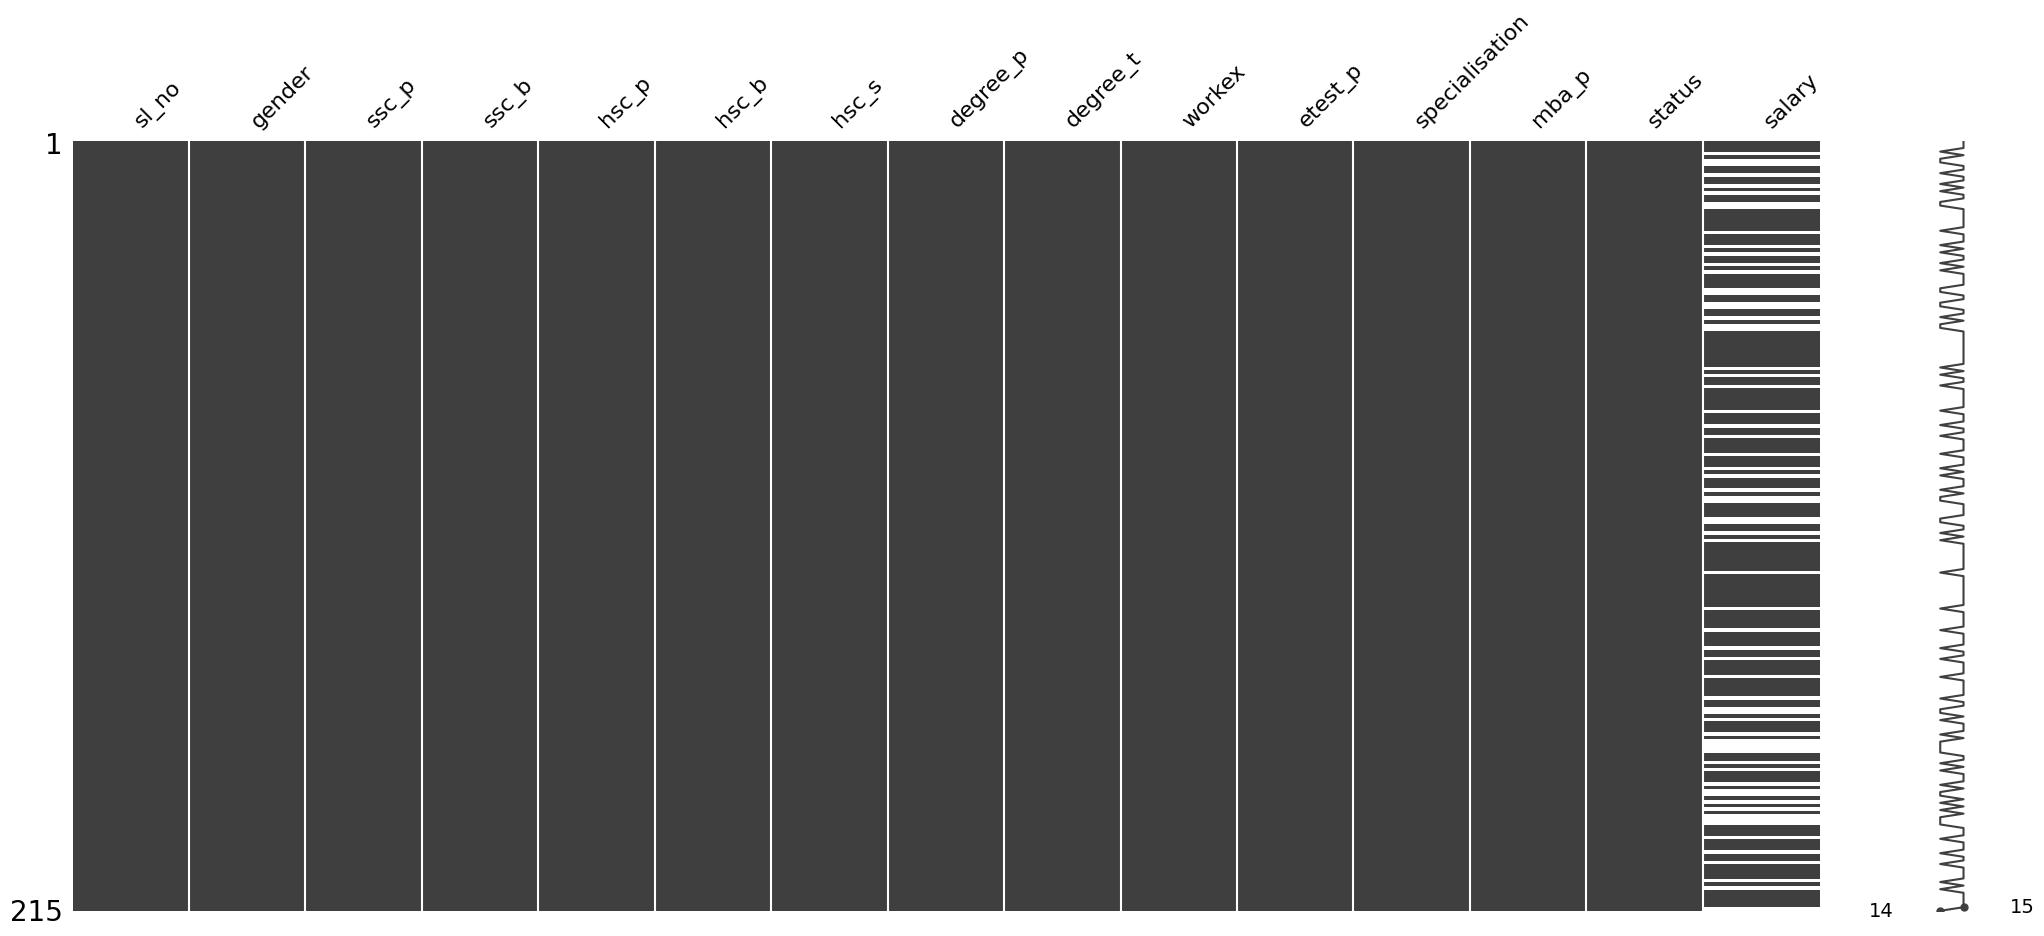

In [4]:
import missingno as msno
msno.matrix(placement)

In [5]:
print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [6]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:', placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


In [7]:
placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Preprocessing data for classficiation models**

In [8]:
X=placement_copy.drop(['status', 'salary'],axis=1)
y=placement_copy.status

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (172, 10)
Input Test: (43, 10)
Output Training: (172,)
Output Test: (43,)


In [10]:
X_train

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
47,M,63.00,60.00,Commerce,57.00,Comm&Mgmt,Yes,78.00,Mkt&Fin,54.55
202,M,70.00,63.00,Science,66.00,Sci&Tech,No,61.28,Mkt&HR,60.11
27,M,63.00,67.00,Commerce,66.00,Comm&Mgmt,No,68.00,Mkt&HR,57.69
58,M,74.00,62.00,Science,68.00,Comm&Mgmt,No,74.00,Mkt&Fin,57.99
40,F,78.00,77.00,Commerce,80.00,Comm&Mgmt,No,60.00,Mkt&Fin,66.72
...,...,...,...,...,...,...,...,...,...,...
203,M,55.68,61.33,Commerce,56.87,Comm&Mgmt,No,66.00,Mkt&HR,58.30
137,M,67.00,63.00,Commerce,72.00,Comm&Mgmt,No,56.00,Mkt&HR,60.41
72,M,84.86,67.00,Science,78.00,Comm&Mgmt,No,95.50,Mkt&Fin,68.53
140,M,65.00,64.80,Commerce,69.50,Comm&Mgmt,Yes,56.00,Mkt&Fin,56.94


In [11]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [13]:
placement_cat = X_train[['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']]

cat_encoder = OneHotEncoder()
placement_cat_1_hot = cat_encoder.fit_transform(placement_cat)
placement_cat_1_hot

<172x12 sparse matrix of type '<class 'numpy.float64'>'
	with 860 stored elements in Compressed Sparse Row format>

In [14]:
placement_num = X_train[['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

placement_num_tr = num_pipeline.fit_transform(placement_num)

In [16]:
from sklearn.compose import ColumnTransformer

num_attribs = ['ssc_p',	'hsc_p', 'degree_p', 'etest_p', 'mba_p']
cat_attribs = ['gender', 'workex', 'specialisation', 'hsc_s', 'degree_t']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

placement_prepared = full_pipeline.fit_transform(X_train)

In [17]:
placement_prepared

array([[-0.37802451, -0.57006221, -1.30846321, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2509715 , -0.29435751, -0.05053648, ...,  0.        ,
         0.        ,  1.        ],
       [-0.37802451,  0.07324875, -0.05053648, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.58624017,  0.07324875,  1.62669918, ...,  1.        ,
         0.        ,  0.        ],
       [-0.19831137, -0.12893469,  0.43865726, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.05968066,  0.90036285, -0.10644433, ...,  0.        ,
         0.        ,  1.        ]])

In [18]:
placement_test_prepared = full_pipeline.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(placement_prepared, y_train)

y_pred = logreg.predict(placement_test_prepared)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(placement_test_prepared, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt = dt.fit(placement_prepared,y_train)

y_pred = dt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7441860465116279


In [21]:
from sklearn.ensemble import RandomForestClassifier

rt=RandomForestClassifier(n_estimators=100)
rt.fit(placement_prepared,y_train)

y_pred=rt.predict(placement_test_prepared)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8837209302325582


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [0.1, 1.0, 10.0]}
  ]

logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5,
                           scoring='precision',
                           return_train_score=True)

grid_search.fit(placement_prepared, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 1.0, 10.0],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}],
             return_train_score=True, scoring='precision')

In [23]:
final_model = grid_search.best_estimator_

In [24]:
some_data = placement.iloc[:5]

In [25]:
some_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [26]:
full_pipeline_with_predictor = Pipeline([
        ("preparation", full_pipeline),
        ("linear", final_model)
    ])

full_pipeline_with_predictor.fit(X_train, y_train)
full_pipeline_with_predictor.predict(some_data)

array([1, 1, 1, 0, 1])

**Save your Model**

In [27]:
import joblib
joblib.dump(full_pipeline_with_predictor, "my_model.pkl")

['my_model.pkl']

---
## B.2 - Deployment with Streamlit

```PY
import streamlit as st
import pandas as pd
import joblib

st.header('FTDS Model Deployment')
st.write("""
Created by FTDS Curriculum Team

Use the sidebar to select input features.
""")

@st.cache
def fetch_data():
    df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/campus.csv')
    return df

df = fetch_data()
st.write(df)

st.sidebar.header('User Input Features')

def user_input():
    gender = st.sidebar.selectbox('Gender', df['gender'].unique())
    ssc = st.sidebar.number_input('Secondary School Points', value=67.00)
    hsc = st.sidebar.number_input('High School Points', 0.0, value=91.0)
    hsc_s = st.sidebar.selectbox('High School Spec', df['hsc_s'].unique())
    degree_p = st.sidebar.number_input('Degree Points', 0.0, value=58.0)
    degree_t = st.sidebar.selectbox('Degree Spec', df['degree_t'].unique())
    workex = st.sidebar.selectbox('Work Experience?', df['workex'].unique())
    etest_p = st.sidebar.number_input('Etest Points', 0.0, value=78.00)
    spec = st.sidebar.selectbox('Specialization', df['specialisation'].unique())
    mba_p = st.sidebar.number_input('MBA Points', 0.0, value=54.55)

    data = {
        'gender': gender,
        'ssc_p': ssc,
        'hsc_p': hsc,
        'hsc_s': hsc_s,
        'degree_p': degree_p,
        'degree_t': degree_t,
        'workex': workex,
        'etest_p': etest_p,
        'specialisation':spec,
        'mba_p': mba_p
    }
    features = pd.DataFrame(data, index=[0])
    return features


input = user_input()

st.subheader('User Input')
st.write(input)

load_model = joblib.load("my_model.pkl")

prediction = load_model.predict(input)

if prediction == 1:
    prediction = 'Placed'
else:
    prediction = 'Not Placed'

st.write('Based on user input, the placement model predicted: ')
st.write(prediction)

```

---
## B.3 - Deploy Your Streamlit app to Huggingface

HuggingFace is a community and data science platform that provides:
* Tools that enable users to build, train and deploy ML models based on open source (OS) code and technologies.

* A place where a broad community of data scientists, researchers, and ML engineers can come together and share ideas, get support and contribute to open source projects.

### B.3.1 - Getting Started -> Your Repository

When you sign up to be a member of Hugging Face you get a Git-based hosted repository where you can store: Models, Datasets and Spaces.

It’s free to sign up as a Community individual contributor. There is a ‘Pro’ plan and separate pricing models for Organisations.


You have to went ahead and signed up, during the process you can also link to a Homepage, Github and Twitter accounts, as shown below:

<img src="https://miro.medium.com/max/1400/0*_ri6ZWReAW0EzQuH"></img>

Once you’ve created an account, you will be redirected to your personal repository. From this page you can do a number of things, including:
* See your Activity feed
* Viewing your profile and settings
* Creating a new Model, Dataset or Space
* See what’s currently trending across the Hugging Face community
* View your the list of Organizations to which you belong and jump into their respective areas
* Tap into helpful resources and documentation


<img src="https://miro.medium.com/max/1400/0*pFzzfWYa8_6UsEDg"></img>





### B.3.2 - Models

When you create a new ‘Model’ it’s actually a Git repo for the files that relate to an ML model you want to share. It has all the benefits you would expect such as versioning, branches, discoverability and so on.

Clicking the ‘+ New’ button from the Hub and then selecting ‘Model’ takes you to a dialog where you can specify a name and the type of OS licence against which you are contributing your model’s code and associated assets.

You can also control the visibility of your model i.e. make it Public and make it visible to Hugging Face community or keep it Private within your personal repository or Organization.

<img src="https://miro.medium.com/max/1400/0*e9-YQGWiSOmET0mr"></img>


Once the model has been created, you will be taken to a repository view, with the ‘Model card’ tab selected by default:

<img src="https://miro.medium.com/max/1400/0*oZej9EimIB4z1c2E"></img>


For regular Git users, the ‘Files and versions’ tab will feel familiar:

<img src="https://miro.medium.com/max/1400/0*pOV0vwEB-qMpcR3q"></img>


Your model repository is empty at the moment, but the screenshot below shows what a fully populated model card would like for one of the Hugging Face community models:

<img src="https://miro.medium.com/max/1400/0*dM-H6pPm5rqQQBSC"></img>

### B.3.3 - Dataset

Creating a new Dataset follows a very similar flow to creating a new model. click the ‘+ New’ button from the Hub and then select ‘Dataset’. You specify the name, licence type, public or private access. Then you see a repository view, with a ‘Dataset card’, ‘Files and versions’, analogous to what you have in the Model repository.

<img src="https://miro.medium.com/max/1400/0*wGs8xW1-4QI3TScC"></img>

### B.3.4 - Spaces

Spaces give you a place to showcase your work in the form of self contained ML demo apps. There are lots of community contributed Spaces available for you to check out if you’re looking for inspiration.


<img src="https://miro.medium.com/max/1400/0*HQBY1H7nuQoUZyAA"></img>


It’s a nice way to build a portfolio of your projects that could be used when presenting, working collaboratively with colleagues in your organization or with the broader ML ecosystem.

To get started click the ‘+ New’ button from the Hub and then select ‘Space’. This takes you to a dialog where you can specify the name of the Space and the licence type.

You will also need to choose an SDK. At the time of writing you can pick from two Python based frameworks for hosting apps: Gradio or Streamlit. Alternatively you can just use custom HTML.

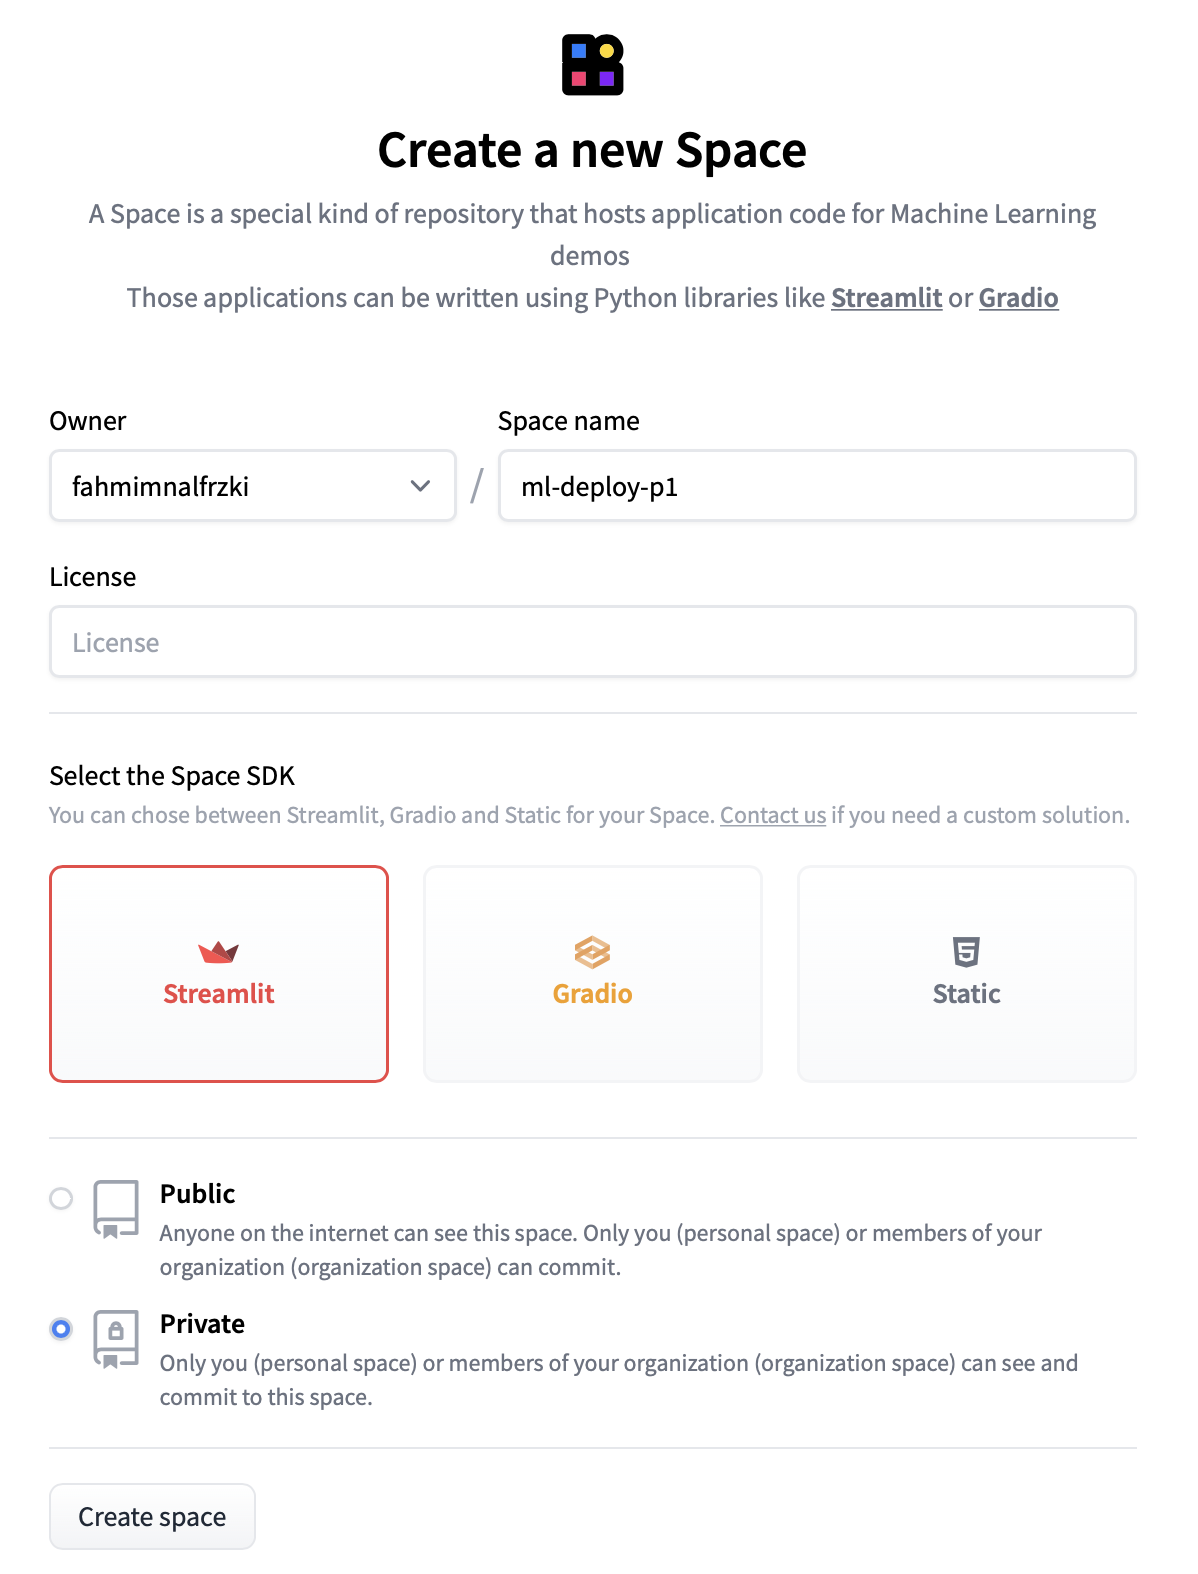

However, in this class, we will choose **Streamlit**.

### B.3.5 - Get Started with Your Spaces!

To get start, you can clone the repository as well as you have done with the Github classroom repo.

```bash
$git clone https://huggingface.co/spaces/fahmimnalfrzki/ml-deploy-p1

$git add app.py
$git commit -m "Add application file"
$git push
```

**Note that don't include the `$` on terminal/prompt**


Huggingface spaces now can run your app.py, but if there are some libraries or depedencies that you need to include with your app, please add requirement.txt file at the root of the repository to specify Python dependencies. Note that Huggingface Spaces only include Streamlit and basic Python library.

Example your requirement.txt:

```
sklearn
pandas
matplotlib
joblib
```



